[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_07-TheMachineLearningFramework/blob/master/T07_CC--DJ--AUC_Coding_Challenge.ipynb)

# Area-Under-Curve Measurement

Objectives:
* Compute true positive, true negative, false positive, and false negative classification rate
* Adjust classification threshold to control above rates
* Plot AUC  to demonstrate accuracy
* Calculate AUC as a single value

### Background

You want to be familiar with ROC and AUC.

#### Receiver Operating Characteristic Curve (ROC)

[wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
[Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall) [sklearn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

#### Area Under Curve (AUC)

[sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

The ROC curve provides a visualization of the performance of a classifier, with false-positive rates along the $x$ axis and true-positive rates along the $y$ axis. A perfect classifier produces no false positives (100% specificity) and no false negatives (100% sensitivity). In reality, classifiers are not so discerning.

### Do:

Correct the bugs in the following code blocks in order to work through the mechanics of building an AUC. 

Once you've calculated `FPR` and `TPR` for the Logistic Regression classifier on its Sprint Challenge dataset and visualized the results, modify it to compute the same data using the _test_ data, instead of the _train_ data.

### 1. Compute Linear Regression Model

Create a training set and train a Logistic Regression model with it

In [11]:
import numpy as np

#import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#!wget -c https://www.dropbox.com/s/bnwfu81bjpf22hp/logistic_regression.csv?raw=1
#!mv logistic_regression.csv?raw=1 logistic_regression.csv
data = pd.read_csv('logistic_regression.csv')
data.shape

(40, 4)

In [22]:
# Use train_test_split to create a training set
train_x, test_x, train_y, test_y = train_test_split(data[['x1','x2']],data['y'])

print(train_x)
print(test_x)
print(train_y)
print(test_y)

# Create and train(fit) the model
regr = LogisticRegression()
regr.fit(train_x, train_y)

          x1        x2
4   2.756526  2.390291
18  4.014969  1.762907
28  3.936969  3.201201
2   1.407508  1.485069
5   0.802475  2.634426
24  4.290889  1.608390
20  5.399972  0.151869
22  4.980625  1.060457
3   0.332565  1.473001
21  6.711284  2.867628
35  6.377077  2.242637
33  6.523576  3.743130
26  6.935077  1.376753
30  3.957267  3.146498
16  2.426030  3.448318
34  5.278695  1.611029
29  6.611718  2.063229
17  1.865028  1.773099
10  0.521809  2.720305
9   0.870838  2.936951
8   2.106265  1.971440
23  6.154712  3.156927
25  6.172081  0.071042
13  1.544444  2.618138
1   3.838055  2.758941
12  1.870913  1.662120
14  1.894235  1.701873
11  3.414063  2.479001
19  2.572448  1.243962
27  4.660378  0.370054
          x1        x2
31  4.499685  2.077359
6   1.215009  1.293564
38  5.397854  0.386743
7   1.627775  2.198055
0   2.903104  3.281307
15  1.969762  1.961860
36  5.811922  3.532272
37  6.789499  0.797753
39  5.647961  3.491709
32  6.359798  1.037724
4     0.0
18    0.0
28    1.0
2   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 2. Predict values for $\hat{y}$ for the test set

In [32]:
# Predict y_hat for the test set created previously

y_hat = regr.predict(test_x)
print('y_hat')
print(y_hat)
print('\ntest_y')
print(test_y)

y_hat
[1. 0. 1. 0. 0. 0. 1. 1. 1. 1.]

test_y
31    1.0
6     0.0
38    1.0
7     0.0
0     0.0
15    0.0
36    1.0
37    1.0
39    1.0
32    1.0
Name: y, dtype: float64


### Observe precision

In [33]:
# True positive: if the prediction is 1, and the original data is 1, their sum is 2
true_positives = (y_hat+test_y)==2
# False positive: if the prediction is 1, but the original data is 0, their sum is 1
false_positives = (y_hat-test_y)==1
print(true_positives.T)
print(false_positives.T)


31     True
6     False
38     True
7     False
0     False
15    False
36     True
37     True
39     True
32     True
Name: y, dtype: bool
31    False
6     False
38    False
7     False
0     False
15    False
36    False
37    False
39    False
32    False
Name: y, dtype: bool


In [34]:
# The probabilities computed by Logistic Regression:
# The columns correspond with class 0 or 1
proba = regr.predict_proba(train_x)
print(proba)

# The decision function computed by Logistic Regression - this is simply
# \sum w_i x_i + b, before the logit function has been applied
dec = regr.decision_function(train_x)
print(dec)

[[0.72931368 0.27068632]
 [0.30416808 0.69583192]
 [0.65129209 0.34870791]
 [0.80697337 0.19302663]
 [0.9575598  0.0424402 ]
 [0.22399848 0.77600152]
 [0.02388639 0.97611361]
 [0.0805686  0.9194314 ]
 [0.92124779 0.07875221]
 [0.08470851 0.91529149]
 [0.0656955  0.9343045 ]
 [0.20419304 0.79580696]
 [0.0175718  0.9824282 ]
 [0.63476482 0.36523518]
 [0.9108297  0.0891703 ]
 [0.10009632 0.89990368]
 [0.04506108 0.95493892]
 [0.7795943  0.2204057 ]
 [0.96982707 0.03017293]
 [0.9657659  0.0342341 ]
 [0.77200153 0.22799847]
 [0.17302171 0.82697829]
 [0.01061289 0.98938711]
 [0.91548293 0.08451707]
 [0.5737417  0.4262583 ]
 [0.7597623  0.2402377 ]
 [0.76257582 0.23742418]
 [0.60815951 0.39184049]
 [0.51800413 0.48199587]
 [0.05811181 0.94188819]]
[-0.99114329  0.82752768 -0.6247236  -1.43046252 -3.11629215  1.24251524
  3.71027012  2.43464647 -2.4594227   2.38002653  2.65477196  1.36029085
  4.02373173 -0.5527131  -2.32380797  2.19615477  3.05362853 -1.26330372
 -3.47017274 -3.33969915 -1.21

$$ \sum w_i x_i + b $$

### 2.1 Build ROC curves

In [35]:
thresholds = np.linspace(0.0,1.0,11)
predictions = pd.DataFrame()

for decision_threshold in thresholds:
    decision_threshold = np.round(decision_threshold,2)
    true_false_array = (proba[::,1:2:] > decision_threshold).T[0]
    predictions[str(decision_threshold)] = true_false_array.astype(int)
        
print(predictions)

    0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
0     1    1    1    0    0    0    0    0    0    0    0
1     1    1    1    1    1    1    1    0    0    0    0
2     1    1    1    1    0    0    0    0    0    0    0
3     1    1    0    0    0    0    0    0    0    0    0
4     1    0    0    0    0    0    0    0    0    0    0
5     1    1    1    1    1    1    1    1    0    0    0
6     1    1    1    1    1    1    1    1    1    1    0
7     1    1    1    1    1    1    1    1    1    1    0
8     1    0    0    0    0    0    0    0    0    0    0
9     1    1    1    1    1    1    1    1    1    1    0
10    1    1    1    1    1    1    1    1    1    1    0
11    1    1    1    1    1    1    1    1    0    0    0
12    1    1    1    1    1    1    1    1    1    1    0
13    1    1    1    1    0    0    0    0    0    0    0
14    1    0    0    0    0    0    0    0    0    0    0
15    1    1    1    1    1    1    1    1    1    0    0
16    1    1  

### 3. Calculate TP and FP at each discrimination level

In [37]:
# Base case:
false_positives = np.sum(predictions['0.1']-train_y.values>1)
true_positives = np.sum(predictions['0.1']+train_y.values==2)
print('False positive rate at threshold 0.1: ',false_positives/np.sum(train_y==0))
print('True positive rate at threshold 0.1: ',true_positives/np.sum(train_y==1))

# Now automate the base case across the set of all decision thresholds
fp = pd.DataFrame()
tp = pd.DataFrame()
for threshold in predictions.columns:
    fp[threshold] = [np.sum(predictions[threshold]-train_y.values==1)/np.sum(train_y==0)]
    tp[threshold] = [np.sum(predictions[threshold]+train_y.values==2)/np.sum(train_y==1)]

# The false positives and true positive rated, based on the sliding decision threshold
print(fp.T)
print(tp.T)

import matplotlib.pyplot as plt
plt.plot(fp.T,tp.T);
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
    

False positive rate at threshold 0.1:  0.0
True positive rate at threshold 0.1:  1.0
          0
0.0  1.0000
0.1  0.6250
0.2  0.5625
0.3  0.2500
0.4  0.1875
0.5  0.0625
0.6  0.0625
0.7  0.0000
0.8  0.0000
0.9  0.0000
1.0  0.0000
            0
0.0  1.000000
0.1  1.000000
0.2  1.000000
0.3  1.000000
0.4  0.857143
0.5  0.857143
0.6  0.857143
0.7  0.857143
0.8  0.714286
0.9  0.571429
1.0  0.000000


Text(0.5,1,'Receiver operating characteristic example')

### 4. Example using sklearn

In [38]:
from sklearn import metrics

0.96875
0.9642857142857143
[0.   0.   0.25 0.25 1.  ]
[0.07142857 0.85714286 0.85714286 1.         1.        ]


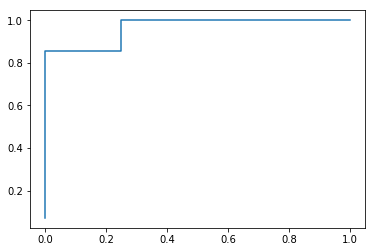

In [39]:
# The Area-Under-The-Curve Score
print(metrics.auc(fp.T,tp.T))
print(metrics.roc_auc_score(train_y.values,proba[::,1:2:]))

# Producing the same false/true positive data via a library and plotting it
fpr, tpr, _ = metrics.roc_curve(train_y.values,proba[::,1:2:])
print(fpr)
print(tpr)
plt.plot(fpr,tpr);

## Do

### 5. Compute the ROC and AUC using the _testset_ instead of the _trainset_


In [41]:
# Compute and plot

# The probabilities computed by Logistic Regression:
# The columns correspond with class 0 or 1
proba = regr.predict_proba(test_x)
print(proba)

# The decision function computed by Logistic Regression - this is simply
# \sum w_i x_i + b, before the logit function has been applied
dec = regr.decision_function(test_x)
print(dec)

[[0.26978349 0.73021651]
 [0.8074439  0.1925561 ]
 [0.02978837 0.97021163]
 [0.86986086 0.13013914]
 [0.84581546 0.15418454]
 [0.79291856 0.20708144]
 [0.29457489 0.70542511]
 [0.01169254 0.98830746]
 [0.32008395 0.67991605]
 [0.02206604 0.97793396]]
[ 0.99572135 -1.43348603  3.48339621 -1.89972911 -1.70215104 -1.34260836
  0.87326735  4.43704253  0.75338602  3.79140234]


In [42]:
thresholds = np.linspace(0.0,1.0,11)
predictions = pd.DataFrame()

for decision_threshold in thresholds:
    decision_threshold = np.round(decision_threshold,2)
    true_false_array = (proba[::,1:2:] > decision_threshold).T[0]
    predictions[str(decision_threshold)] = true_false_array.astype(int)
        
print(predictions)

   0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
0    1    1    1    1    1    1    1    1    0    0    0
1    1    1    0    0    0    0    0    0    0    0    0
2    1    1    1    1    1    1    1    1    1    1    0
3    1    1    0    0    0    0    0    0    0    0    0
4    1    1    0    0    0    0    0    0    0    0    0
5    1    1    1    0    0    0    0    0    0    0    0
6    1    1    1    1    1    1    1    1    0    0    0
7    1    1    1    1    1    1    1    1    1    1    0
8    1    1    1    1    1    1    1    0    0    0    0
9    1    1    1    1    1    1    1    1    1    1    0


False positive rate at threshold 0.1:  0.0
True positive rate at threshold 0.1:  1.0
        0
0.0  1.00
0.1  1.00
0.2  0.25
0.3  0.00
0.4  0.00
0.5  0.00
0.6  0.00
0.7  0.00
0.8  0.00
0.9  0.00
1.0  0.00
            0
0.0  1.000000
0.1  1.000000
0.2  1.000000
0.3  1.000000
0.4  1.000000
0.5  1.000000
0.6  1.000000
0.7  0.833333
0.8  0.500000
0.9  0.500000
1.0  0.000000


Text(0.5,1,'Receiver operating characteristic example')

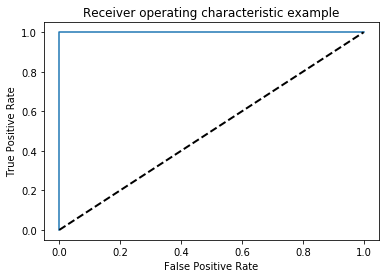

In [43]:
false_positives = np.sum(predictions['0.1']-test_y.values>1)
true_positives = np.sum(predictions['0.1']+test_y.values==2)
print('False positive rate at threshold 0.1: ',false_positives/np.sum(test_y==0))
print('True positive rate at threshold 0.1: ',true_positives/np.sum(test_y==1))

# Now automate the base case across the set of all decision thresholds
fp = pd.DataFrame()
tp = pd.DataFrame()
for threshold in predictions.columns:
    fp[threshold] = [np.sum(predictions[threshold]-test_y.values==1)/np.sum(test_y==0)]
    tp[threshold] = [np.sum(predictions[threshold]+test_y.values==2)/np.sum(test_y==1)]

# The false positives and true positive rated, based on the sliding decision threshold
print(fp.T)
print(tp.T)

import matplotlib.pyplot as plt
plt.plot(fp.T,tp.T);
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
    